In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd drive/MyDrive/nlp_2

/content/drive/MyDrive/nlp_2


In [4]:
ls

baseline.py            get_bleu_score.py  lstm_attention.py  requirements.txt
data_preprocessing.py  GRU_attention.py   main.py            train_pipeline.py
data.txt               GRU_only.py        __pycache__/       utils.py


In [5]:
!pip install -r requirements.txt -q

     |████████████████████████████████| 112 kB 34.1 MB/s 
     |████████████████████████████████| 49 kB 7.5 MB/s 
     |████████████████████████████████| 140 kB 71.5 MB/s 
     |████████████████████████████████| 596 kB 63.4 MB/s 
     |████████████████████████████████| 829 kB 48.3 MB/s 
     |████████████████████████████████| 136 kB 70.1 MB/s 
     |████████████████████████████████| 134 kB 78.5 MB/s 
     |████████████████████████████████| 133 kB 81.5 MB/s 
     |████████████████████████████████| 132 kB 78.1 MB/s 
     |████████████████████████████████| 132 kB 81.0 MB/s 
     |████████████████████████████████| 125 kB 12.0 MB/s 
     |████████████████████████████████| 125 kB 79.1 MB/s 
     |████████████████████████████████| 123 kB 80.3 MB/s 
     |████████████████████████████████| 119 kB 79.0 MB/s 
     |████████████████████████████████| 118 kB 69.9 MB/s 
     |████████████████████████████████| 115 kB 75.1 MB/s 
     |████████████████████████████████| 114 kB 71.4 MB/s 
     |██████████

In [6]:
import matplotlib.pyplot as plt

import data_preprocessing
import get_bleu_score
import train_pipeline
import utils

import lstm_attention
import GRU_attention
import GRU_only
import baseline

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
/u

In [7]:
train_data, valid_data, test_data, SRC, TRG = data_preprocessing.return_preprocessed_data()

# 1 Baseline with more iterations

In [8]:
baseline_model, train_history, valid_history, test_iterator = \
                train_pipeline.train_model(train_data, 
                                           valid_data, 
                                           test_data, 
                                           SRC, TRG,
                                           baseline.Encoder,
                                           baseline.Decoder, 
                                           baseline.Seq2Seq, 
                                           'Baseline 30 iters',
                                           batch_size=32,
                                           n_iter=30)

1250it [02:18,  9.02it/s]
1250it [02:18,  9.03it/s]
1250it [02:19,  8.94it/s]
1250it [02:18,  9.04it/s]
1250it [02:18,  9.01it/s]
1250it [02:18,  9.01it/s]
1250it [02:18,  9.06it/s]
1250it [02:18,  9.01it/s]
1250it [02:18,  9.00it/s]
1250it [02:18,  9.02it/s]
1250it [02:18,  9.04it/s]
1250it [02:18,  9.03it/s]
1250it [02:19,  8.98it/s]
1250it [02:17,  9.07it/s]
1250it [02:18,  9.03it/s]
1250it [02:19,  8.98it/s]
1250it [02:19,  8.99it/s]
1250it [02:19,  8.97it/s]
1250it [02:18,  9.00it/s]
1250it [02:18,  9.04it/s]
1250it [02:18,  8.99it/s]
1250it [02:19,  8.98it/s]
1250it [02:18,  9.02it/s]
1250it [02:18,  9.03it/s]
1250it [02:18,  9.06it/s]
1250it [02:19,  8.95it/s]
1250it [02:19,  8.99it/s]
1250it [02:18,  9.03it/s]
1250it [02:17,  9.09it/s]
1250it [02:17,  9.07it/s]


In [9]:
bleu_score, original_text, generated_text = get_bleu_score.get_bleu_score(baseline_model, test_iterator, TRG)

In [10]:
print(bleu_score)

22.515600501017328


In [11]:
for i in range(5):
    print('original:', ' '.join(original_text[i]))
    print('translated:', ' '.join(generated_text[i]))
    print()

original: there is also a kitchen , fitted with an oven .
translated: kitchen is fitted with an oven and a refrigerator .

original: free wifi is available .
translated: free wi - fi access is available .

original: the property also offers free parking .
translated: parking is provided .

original: other facilities offered include a massage .
translated: a massage service is available .

original: the accommodation will provide you with air conditioning .
translated: air conditioning and air conditioning .



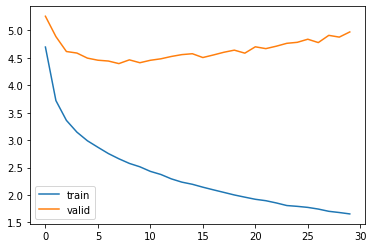

In [12]:
plt.plot(train_history, label='train')
plt.plot(valid_history, label='valid')
plt.legend()

Бейзлайн с увеличенным количеством итераций (30) удалось обучить до BLEU = 22.52.  
Качестве модели очень среднее.  
Обучение на Colab длилось около часа.  
Модель переобучается после 10 итерации.  
В режиме inference модель сможет обрабатывать батч размером 32 за 0.1 секунды.

# 2. Only GRU

In [13]:
gru_only_model, train_history, valid_history, test_iterator = \
                train_pipeline.train_model(train_data, 
                                           valid_data, 
                                           test_data, 
                                           SRC, TRG,
                                           GRU_only.Encoder,
                                           GRU_only.Decoder, 
                                           GRU_only.Seq2Seq, 
                                           'Baseline 20 iters',
                                           batch_size=32,
                                           n_iter=20)

1250it [02:10,  9.58it/s]
1250it [02:10,  9.58it/s]
1250it [02:10,  9.60it/s]
1250it [02:10,  9.58it/s]
1250it [02:09,  9.69it/s]
1250it [02:09,  9.67it/s]
1250it [02:08,  9.74it/s]
1250it [02:09,  9.64it/s]
1250it [02:08,  9.70it/s]
1250it [02:08,  9.71it/s]
1250it [02:09,  9.68it/s]
1250it [02:09,  9.66it/s]
1250it [02:09,  9.65it/s]
1250it [02:09,  9.68it/s]
1250it [02:08,  9.69it/s]
1250it [02:08,  9.71it/s]
1250it [02:10,  9.58it/s]
1250it [02:10,  9.58it/s]
1250it [02:09,  9.62it/s]
1250it [02:09,  9.67it/s]


In [14]:
bleu_score, original_text, generated_text = get_bleu_score.get_bleu_score(gru_only_model, test_iterator, TRG)
print(bleu_score)

22.662869605331153


In [15]:
for i in range(5):
    print('original:', ' '.join(original_text[i]))
    print('translated:', ' '.join(generated_text[i]))
    print()

original: there is also a kitchen , fitted with an oven .
translated: an oven .

original: free wifi is available .
translated: free wifi access is available .

original: the property also offers free parking .
translated: parking is free .

original: other facilities offered include a massage .
translated: massage treatments .

original: the accommodation will provide you with air conditioning .
translated: air conditioning .



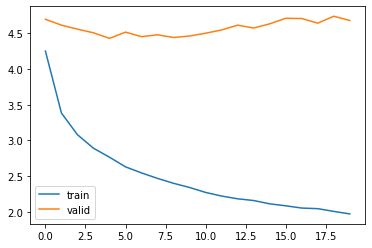

In [16]:
plt.plot(train_history, label='train')
plt.plot(valid_history, label='valid')
plt.legend()

Обычный decoder-encoder на GRU на 20 итерациях удалось обучить до BLEU = 22.66.  
Качестве модели хуже, чем бейзлайн.  
Модель переобучается после 8 итерации.  
Обучение на Colab длилось полчаса (быстрее, чем LSTM baseline, что вполне логично). 
В режиме inference модель сможет обрабатывать батч размером 32 за 0.09 секунды.

# 3. GRU with Attention

In [17]:
gru_attention_model, train_history, valid_history, test_iterator = \
                train_pipeline.train_model(train_data, 
                                           valid_data, 
                                           test_data, 
                                           SRC, TRG,
                                           GRU_attention.Encoder,
                                           GRU_attention.Decoder, 
                                           GRU_attention.Seq2Seq, 
                                           'GRU only 20 iters',
                                           batch_size=32,
                                           n_iter=10)

1250it [03:00,  6.94it/s]
1250it [03:01,  6.87it/s]
1250it [03:02,  6.84it/s]
1250it [03:02,  6.86it/s]
1250it [03:02,  6.86it/s]
1250it [03:01,  6.87it/s]
1250it [03:03,  6.81it/s]
1250it [03:03,  6.81it/s]
1250it [03:04,  6.79it/s]
1250it [03:03,  6.82it/s]


In [18]:
bleu_score, original_text, generated_text = get_bleu_score.get_bleu_score(gru_attention_model, test_iterator, TRG)

In [19]:
print(bleu_score)

28.363879166789857


In [20]:
for i in range(5):
    print('original:', ' '.join(original_text[i]))
    print('translated:', ' '.join(generated_text[i]))
    print()

original: there is also a kitchen , fitted with an oven .
translated: kitchen with an oven .

original: free wifi is available .
translated: free wi - fi access is available .

original: the property also offers free parking .
translated: parking is available .

original: other facilities offered include a massage .
translated: massage treatments are available .

original: the accommodation will provide you with air conditioning .
translated: air - conditioned accommodation is available .



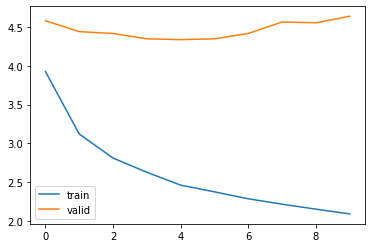

In [21]:
plt.plot(train_history, label='train')
plt.plot(valid_history, label='valid')
plt.legend()

Decoder-encoder GRU c Attention на 10 итерациях показала качество BLEU = 28.36.  
Качестве модели лучше, чем все предыдущие. 
Обучение длилось полчаса 
Модель переобучается после 5 итерации.  
В режиме inference модель сможет обрабатывать батч размером 32 за 0.14 секунды.

# 4. LSTM with Attention

In [22]:
lstm_attention_model, train_history, valid_history, test_iterator = \
                train_pipeline.train_model(train_data, 
                                           valid_data, 
                                           test_data, 
                                           SRC, TRG,
                                           lstm_attention.Encoder,
                                           lstm_attention.Decoder, 
                                           lstm_attention.Seq2Seq, 
                                           'LSTM_attention 10 iters',
                                           batch_size=32,
                                           n_iter=10)

1250it [03:30,  5.95it/s]
1250it [03:28,  5.99it/s]
1250it [03:29,  5.98it/s]
1250it [03:29,  5.98it/s]
1250it [03:29,  5.97it/s]
1250it [03:28,  6.01it/s]
1250it [03:28,  5.98it/s]
1250it [03:27,  6.02it/s]
1250it [03:28,  6.00it/s]
1250it [03:28,  5.99it/s]


In [23]:
bleu_score, original_text, generated_text = get_bleu_score.get_bleu_score(lstm_attention_model, test_iterator, TRG)
print(bleu_score)

33.03116908292025


In [24]:
for i in range(5):
    print('original:', ' '.join(original_text[i]))
    print('translated:', ' '.join(generated_text[i]))
    print()

original: there is also a kitchen , fitted with an oven .
translated: the kitchen is equipped with an oven .

original: free wifi is available .
translated: free wifi - fi access is available .

original: the property also offers free parking .
translated: the property offers free parking .

original: other facilities offered include a massage .
translated: massage treatments are available .

original: the accommodation will provide you with air conditioning .
translated: the air - conditioned unit is



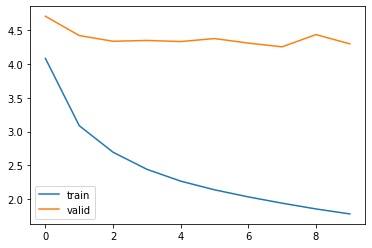

In [25]:
plt.plot(train_history, label='train')
plt.plot(valid_history, label='valid')
plt.legend()

Decoder-encoder LSTM c Attention на 10 итерациях показала качество BLEU = 33.03.  
Качестве модели наилучшее.  
Обучение длилось полчаса
Модель переобучается после 5 итерации, но значительно меньше, чем предыдущие модели.  
В режиме inference модель сможет обрабатывать батч размером 32 за 0.14 секунды, как и GRU with Attention

Общие выводы:


*   Удалось выбить максимальное качество BLEU = 33.03 на LSTM with Attention.
*   В целом модели с Attention справляются лучше с задачей перевода, однако, обучаются значительно дольше. Так же снижается переобучение.

